## Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols,diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple Cost Function
### $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#create sequence of data
x_1 = np.linspace(start=-3,stop=3,num=100)

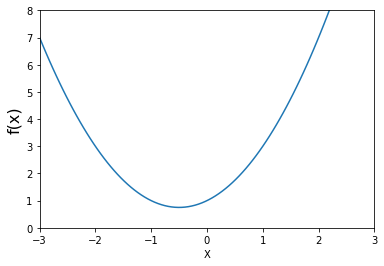

In [4]:
# plot cost against x
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

### derivative

In [5]:
def df(x):
    return 2*x + 1

<function matplotlib.pyplot.show(close=None, block=None)>

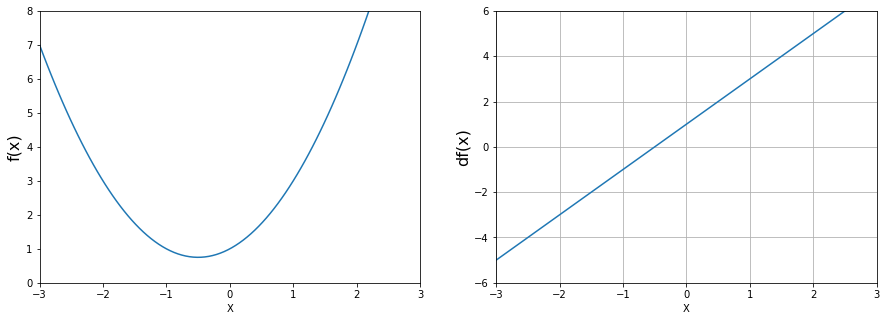

In [6]:
# plot cost againt x and derivative

plt.figure(figsize=[15,5])

# cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))

# Derivative
plt.subplot(1,2,2)
plt.plot(x_1, df(x_1))
plt.grid()
plt.xlabel('X')
plt.ylabel('df(x)',fontsize=16)
plt.xlim([-3,3])
plt.ylim(-6,6)

plt.show


## Gradient Descent

In [7]:
new_x = 3
prev_x = 0
Step_multiplier = 0.1  # learining rate
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - Step_multiplier*gradient
    
    step_size = abs(new_x-prev_x)
    if(step_size<precision):
        break
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    

print('local minimum occurs at: ',new_x)
print('slope | df(x) at: ',df(new_x))
print('f(x) value or cost at point: ',f(new_x))
print('local values ', x_list)
print()
print('slope list :',slope_list)

local minimum occurs at:  -0.49962781616118024
slope | df(x) at:  0.0007443676776395236
f(x) value or cost at point:  0.7500001385208099
local values  [3, 2.3, 1.7399999999999998, 1.2919999999999998, 0.9335999999999998, 0.6468799999999998, 0.41750399999999976, 0.2340031999999998, 0.08720255999999982, -0.03023795200000015, -0.12419036160000013, -0.1993522892800001, -0.25948183142400005, -0.30758546513920004, -0.34606837211136005, -0.376854697689088, -0.4014837581512704, -0.4211870065210163, -0.43694960521681303, -0.44955968417345044, -0.45964774733876035, -0.46771819787100827, -0.4741745582968066, -0.47933964663744527, -0.4834717173099562, -0.48677737384796493, -0.48942189907837197, -0.49153751926269756, -0.49323001541015804, -0.49458401232812643, -0.4956672098625011, -0.4965337678900009, -0.4972270143120007, -0.4977816114496006, -0.49822528915968045, -0.49858023132774437, -0.4988641850621955, -0.4990913480497564, -0.4992730784398051, -0.4994184627518441, -0.4995347702014753]

slope lis

<function matplotlib.pyplot.show(close=None, block=None)>

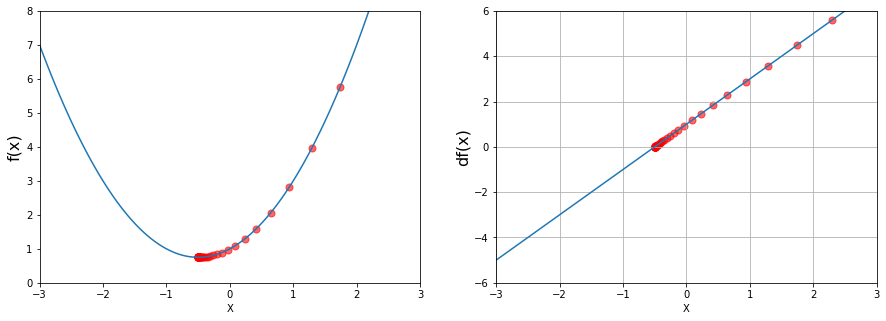

In [8]:
# plot cost againt x and derivative

plt.figure(figsize=[15,5])

# cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))

#values after gradient descent
values = np.array(x_list)  # convert list to array. because we need to put values in f.
plt.scatter(x_list, f(values), color='red',s=50,alpha=0.6)

# Derivative
plt.subplot(1,2,2)
plt.plot(x_1, df(x_1))
plt.grid()
plt.xlabel('X')
plt.ylabel('df(x)',fontsize=16)
plt.xlim([-3,3])
plt.ylim(-6,6)

plt.scatter(x_list,slope_list,color='red',s=50,alpha=0.6)

plt.show


## Example 2 - Multiple Minima
### $g(x) = x^4 -  4*x^2 + 5$

In [9]:
# set of x values
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4-4*x**2+5

def dg(x):
    return 4*x**3-8*x

<function matplotlib.pyplot.show(close=None, block=None)>

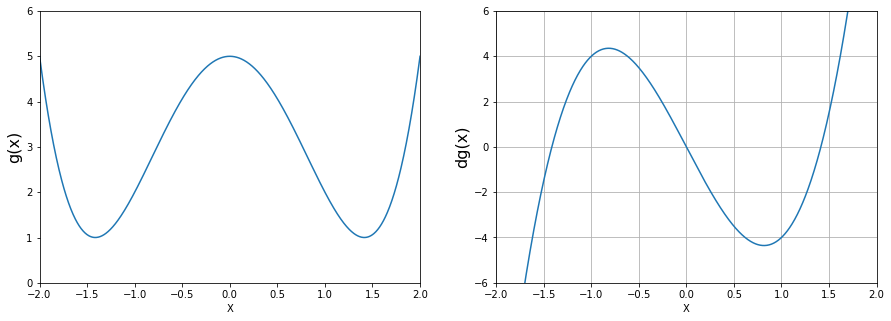

In [10]:
# plot cost againt x and derivative

plt.figure(figsize=[15,5])

# cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim(0,6)
plt.xlabel('X')
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2))

# Derivative
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2))
plt.grid()
plt.xlabel('X')
plt.ylabel('dg(x)',fontsize=16)
plt.xlim([-2,2])
plt.ylim(-6,6)

plt.show

In [11]:

# function
def GradientDescent(derivative,initial,multiplier=0.02,precision=0.00001,max_itr=300):

    x_list = [initial]
    slope_list = [derivative(initial)]
    new_x = initial

    for n in range(max_itr):
        prev_x = new_x
        gradient = derivative(prev_x)
        new_x = prev_x - Step_multiplier*gradient
        step_size = abs(new_x-prev_x)
        if(step_size<precision):
            break
        x_list.append(new_x)
        slope_list.append(derivative(new_x))
    
    return new_x,x_list,slope_list
    

In [12]:
local_min,list_x,list_derivative = GradientDescent(derivative=dg,initial=2.0,multiplier=0.1,precision=0.00001)
print(local_min)

1.414211082183292


# take details of functions : shift+Tab

# Example 3 - Divergence, Overflow & Python tuples
## $h(x) = x^5 - 2x^4 + 2$

In [13]:
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [14]:
local_min,x3_list,slope3_list = GradientDescent(derivative=dh,initial=-0.2,max_itr=18)

local min  -279496619.3660618
cost at local min  -1.705622040572423e+42
number of steps  19


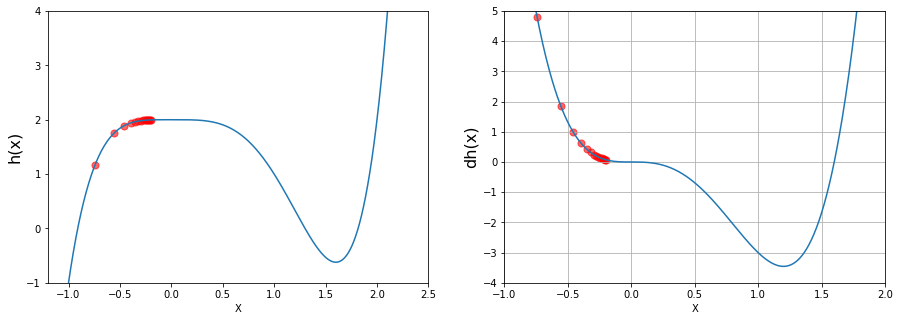

In [15]:
# plot cost againt x and derivative

plt.figure(figsize=[15,5])

# cost function
plt.subplot(1,2,1)
plt.xlim([-1.2,2.5])
plt.ylim(-1,4)
plt.xlabel('X')
plt.ylabel('h(x)',fontsize=16)
plt.plot(x_3,h(x_3))

#values after gradient descent
values = np.array(x3_list)  # convert list to array. because we need to put values in f.
plt.scatter(x3_list, h(values), color='red',s=50,alpha=0.6)

# Derivative
plt.subplot(1,2,2)
plt.grid()
plt.xlabel('X')
plt.ylabel('dh(x)',fontsize=16)
plt.xlim([-1,2])
plt.ylim(-4,5)
plt.plot(x_3, dh(x_3))

plt.scatter(x3_list,slope3_list,color='red',s=50,alpha=0.6)

plt.show

print('local min ',local_min)
print('cost at local min ', h(local_min))
print('number of steps ',len(x3_list))

In [16]:
import sys
sys.float_info.max


1.7976931348623157e+308

In [17]:
# python tuples
food = 'mango','banana','apple',1,2,1.5
print(food)

('mango', 'banana', 'apple', 1, 2, 1.5)


In [18]:
food_list = ['mango','banana','apple',1,2,1.5]
print(food_list)

['mango', 'banana', 'apple', 1, 2, 1.5]


# Example 4 : Data Viz with 3D charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$
Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [19]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [20]:
#Make our x and y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

print('shape of X array', x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)
print('shape x after meshgrid: ',x_4.shape)

shape of X array (200,)
shape x after meshgrid:  (200, 200)


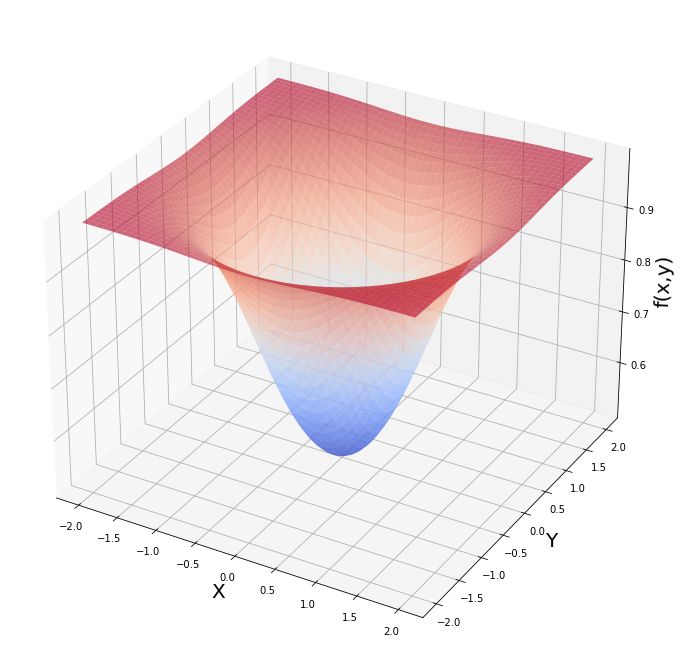

In [21]:
#generate 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.6)

# Partial derivatives & Sybolic Computation

In [22]:
a,b = symbols('x,y')
print('Our cost function f(x,y) is :' , f(a,b))
print('Partial derivative wrt x is :' , diff(f(a,b),a))
print('Cost at a=1.8,b=1.0 : ', f(a,b).evalf(subs={a:1.8,b:1.0}))
print('value of partial derivative wrt x at a=1.8,b=1.0 : ', diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is : 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Cost at a=1.8,b=1.0 :  0.990604794032582
value of partial derivative wrt x at a=1.8,b=1.0 :  0.0368089716197505


# Batch Gradient Descent with Sympy

In [23]:
#setup values
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #initial guess

for n in  range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    
    params = params - multiplier*gradients

print('Values in gradient array', gradients )
print('Minimum at x= ', params[0])
print('Minimum at x= ', params[1])
print('Cost is', f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum at x=  3.45838599885832e-11
Minimum at x=  1.92132555492129e-11
Cost is 0.500000000000000


In [24]:
#partial derivatives wrt x
def fpx(x,y):
    r = 3**(-x**2-y**2)
    return 2*x*log(3)*r / (r+1)**2

#partial derivatives wrt y
def fpy(x,y):
    r = 3**(-x**2-y**2)
    return 2*y*log(3)*r / (r+1)**2

In [25]:
fpx(1.8,1.0)

0.036808971619750504

In [26]:
#setup values
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #initial guess

for n in  range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    
    params = params - multiplier*gradients

print('Values in gradient array', gradients )
print('Minimum at x= ', params[0])
print('Minimum at x= ', params[1])
print('Cost is', f(params[0],params[1]))

#this is more effient since no need to calc partial derivative everytime

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum at x=  3.458385998858304e-11
Minimum at x=  1.9213255549212797e-11
Cost is 0.5


# Plot 3D gradient descent and numpy arrays

In [27]:
#setup values
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #initial guess
#print(params)
#print(params.shape)
values_array = params.reshape(1,2)
#print(values_array)
#print(values_array.shape)

for n in  range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    
    params = params - multiplier*gradients
    values_array = np.append(values_array, params.reshape(1,2),axis=0)
    # values_array = np.concatenate((values_array,params.reshape(1,2)),axis=0)

print('Values in gradient array', gradients )
print('Minimum at x= ', params[0])
print('Minimum at x= ', params[1])
print('Cost is', f(params[0],params[1]))

#this is more effient since no need to calc partial derivative everytime

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum at x=  3.458385998858304e-11
Minimum at x=  1.9213255549212797e-11
Cost is 0.5


In [28]:
kirk = np.array([[1,2]])  #shape (1,2)
kirk2 = np.array([[11,22],[33,44]]) #shape (2,2)

root = np.append(arr=kirk2,values=kirk,axis=0)
#root2 = np.append(arr=kirk2,values=kirk,axis=1)  dimentions not match

kirk3 = np.array([[1],[2]]) #shape (2,1)
root3 = np.append(arr=kirk2,values=kirk3,axis=1)

kirk4 = kirk.reshape(2,1)

#print(root)
#print(root3)
#print(kirk)
#print(kirk4)
#print(kirk3)

get_column = root[:,0]  # take all rows and only o'th column in each row
print(get_column)

[11 33  1]


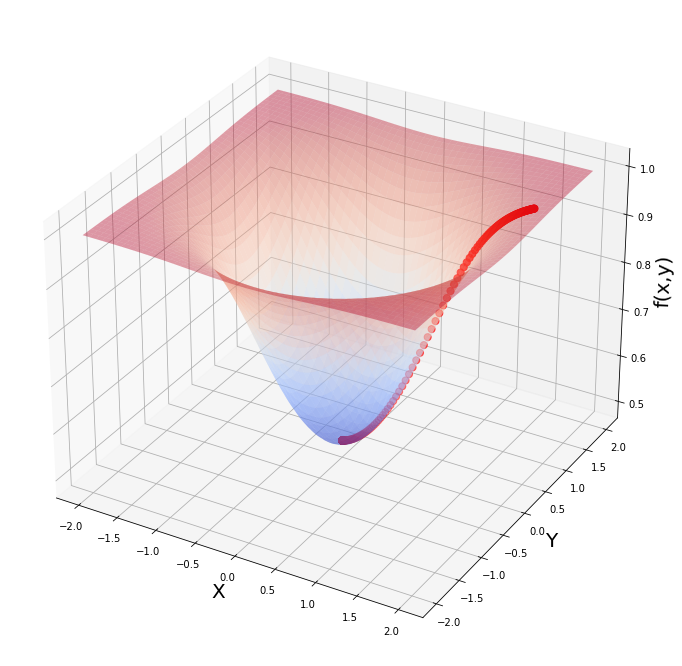

In [29]:
#generate 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]), color='red',s=50)

# Example 5 - Working with data & real Cost function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)}-h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)}-h_\theta x^{(i)} \big)^2$$


In [30]:
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [31]:
regr = LinearRegression()
regr.fit(x_5,y_5)
print('theta1',regr.coef_[0][0])
print('theta0',regr.intercept_[0])

theta1 1.2227264637835915
theta0 0.8475351486029536


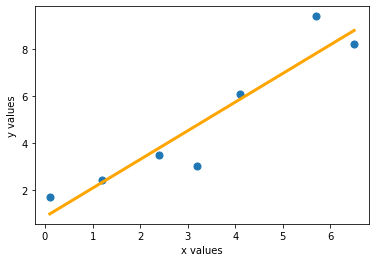

In [32]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5, regr.predict(x_5), color='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show( )

In [33]:
# y_hat = theta0 + theta1*x   predicted values using Li.Re.
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print(y_hat)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [34]:
#funtion for calc MSE
def mse(y,y_hat):
    #mse_calc = (1/y.size)*sum((y-y_hat)**2)
    mse_calc = np.average((y-y_hat)**2,axis=0)
    return mse_calc

In [35]:
#manually calc MSE
print(mse(y_5,y_hat))
#mse by sklearn
print(mean_squared_error(y_5,regr.predict(x_5)))

[0.94796558]
0.9479655759794577


# 3D plot for the MSE Cost Function

## Make data fot thetas


In [36]:
num_thetas = 200
th_0 = np.linspace(-1,3,num=num_thetas)
th_1 = np.linspace(-1,3,num=num_thetas)
plot_0,plot_1 = np.meshgrid(th_0,th_1)

print(th_0.shape,th_1.shape)
print(plot_0.shape,plot_1.shape)
print(th_0)
print(plot_0)
print(th_1)
print(plot_1)

(200,) (200,)
(200, 200) (200, 200)
[-1.         -0.9798995  -0.95979899 -0.93969849 -0.91959799 -0.89949749
 -0.87939698 -0.85929648 -0.83919598 -0.81909548 -0.79899497 -0.77889447
 -0.75879397 -0.73869347 -0.71859296 -0.69849246 -0.67839196 -0.65829146
 -0.63819095 -0.61809045 -0.59798995 -0.57788945 -0.55778894 -0.53768844
 -0.51758794 -0.49748744 -0.47738693 -0.45728643 -0.43718593 -0.41708543
 -0.39698492 -0.37688442 -0.35678392 -0.33668342 -0.31658291 -0.29648241
 -0.27638191 -0.25628141 -0.2361809  -0.2160804  -0.1959799  -0.1758794
 -0.15577889 -0.13567839 -0.11557789 -0.09547739 -0.07537688 -0.05527638
 -0.03517588 -0.01507538  0.00502513  0.02512563  0.04522613  0.06532663
  0.08542714  0.10552764  0.12562814  0.14572864  0.16582915  0.18592965
  0.20603015  0.22613065  0.24623116  0.26633166  0.28643216  0.30653266
  0.32663317  0.34673367  0.36683417  0.38693467  0.40703518  0.42713568
  0.44723618  0.46733668  0.48743719  0.50753769  0.52763819  0.54773869
  0.5678392   0.

In [37]:
plot_cost = np.zeros((num_thetas,num_thetas))

for i in range(num_thetas):
    for j in range(num_thetas):
        y_hat = plot_0[i][j] + plot_1[i][j]*x_5
        plot_cost[i][j] = mse(y_5,y_hat)
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

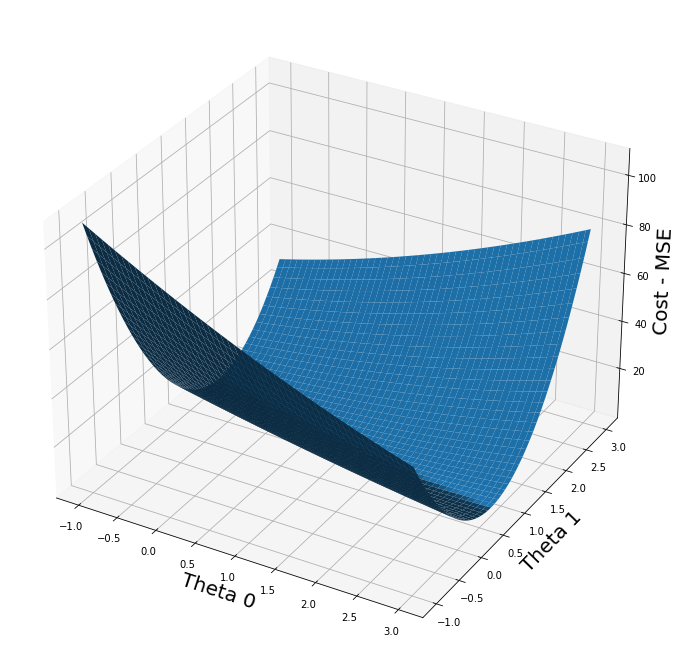

In [38]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_0,plot_1,plot_cost)
plt.show()

In [39]:
print('Min value of plt_cost',plot_cost.min)
ij_min = np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
print('Min occurs at', ij_min)
print('Min MSE for theta 0: ', plot_0[111][91] )
print('Min MSE for theta 1: ', plot_1[111][91] )

Min value of plt_cost <built-in method min of numpy.ndarray object at 0x000001E1040BD870>
Min occurs at (111, 91)
Min MSE for theta 0:  0.829145728643216
Min MSE for theta 1:  1.2311557788944723


# Partial derivative of MSE wrt $\theta_0$ and $\theta_1$
# MSE & Gradient Descent

In [42]:
def grad(x,y,thetas):
    n=y.size
    
    theta0_slope =  (-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope =  (-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)
    #return np.array([theta0_slope[0],theta1_slope[0]])
    return np.append(arr=theta0_slope,values=theta1_slope)

In [49]:
#calc min using gradient descent
multiplier = 0.01
thetas = np.array([2.9,2.9])

#Collect data points
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier*grad(x_5,y_5,thetas)
    
    #append new values to our munpy arrays
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals = np.append(arr=mse_vals,values=mse(y_5,thetas[0]+thetas[1]*5))

#results
print('Min occurs at theta 0:', thetas[0])
print('Min occurs at theta 1:', thetas[1])
print('MSE is', mse(y_5, thetas[0]+thetas[1]*x_5))

# same as prev 2 calculations

Min occurs at theta 0: 0.8532230461743415
Min occurs at theta 1: 1.2214935332607393
MSE is [0.94797511]


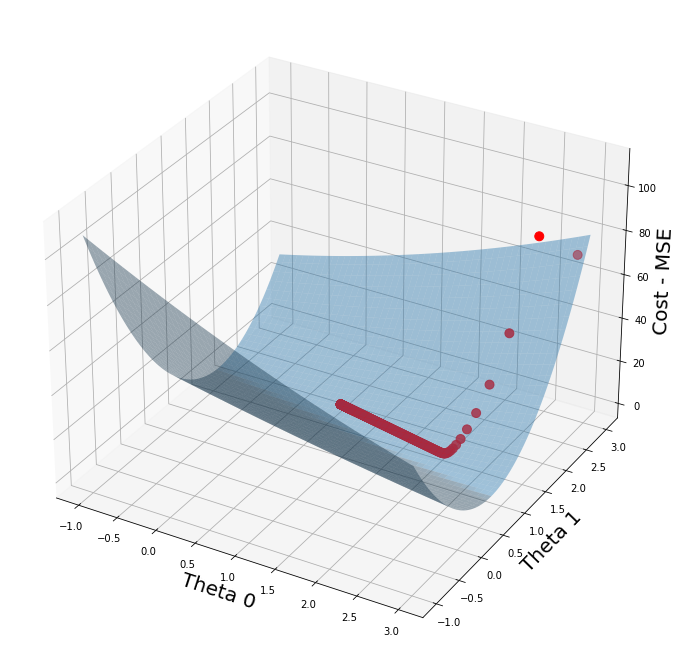

In [53]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,color='red')
ax.plot_surface(plot_0,plot_1,plot_cost, alpha=0.4)
plt.show()